In [107]:
#loading the dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggl

In [108]:
!kaggle datasets download -d shree1992/housedata

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
housedata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [109]:
import zipfile
zip_ref = zipfile.ZipFile('/content/housedata.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from  matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats

from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics



In [111]:
#default = 'warn'
sns.set()
style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None

In [112]:
#Load Data
data=pd.read_csv('data.csv')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [113]:
data.shape

(4600, 18)

In [114]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


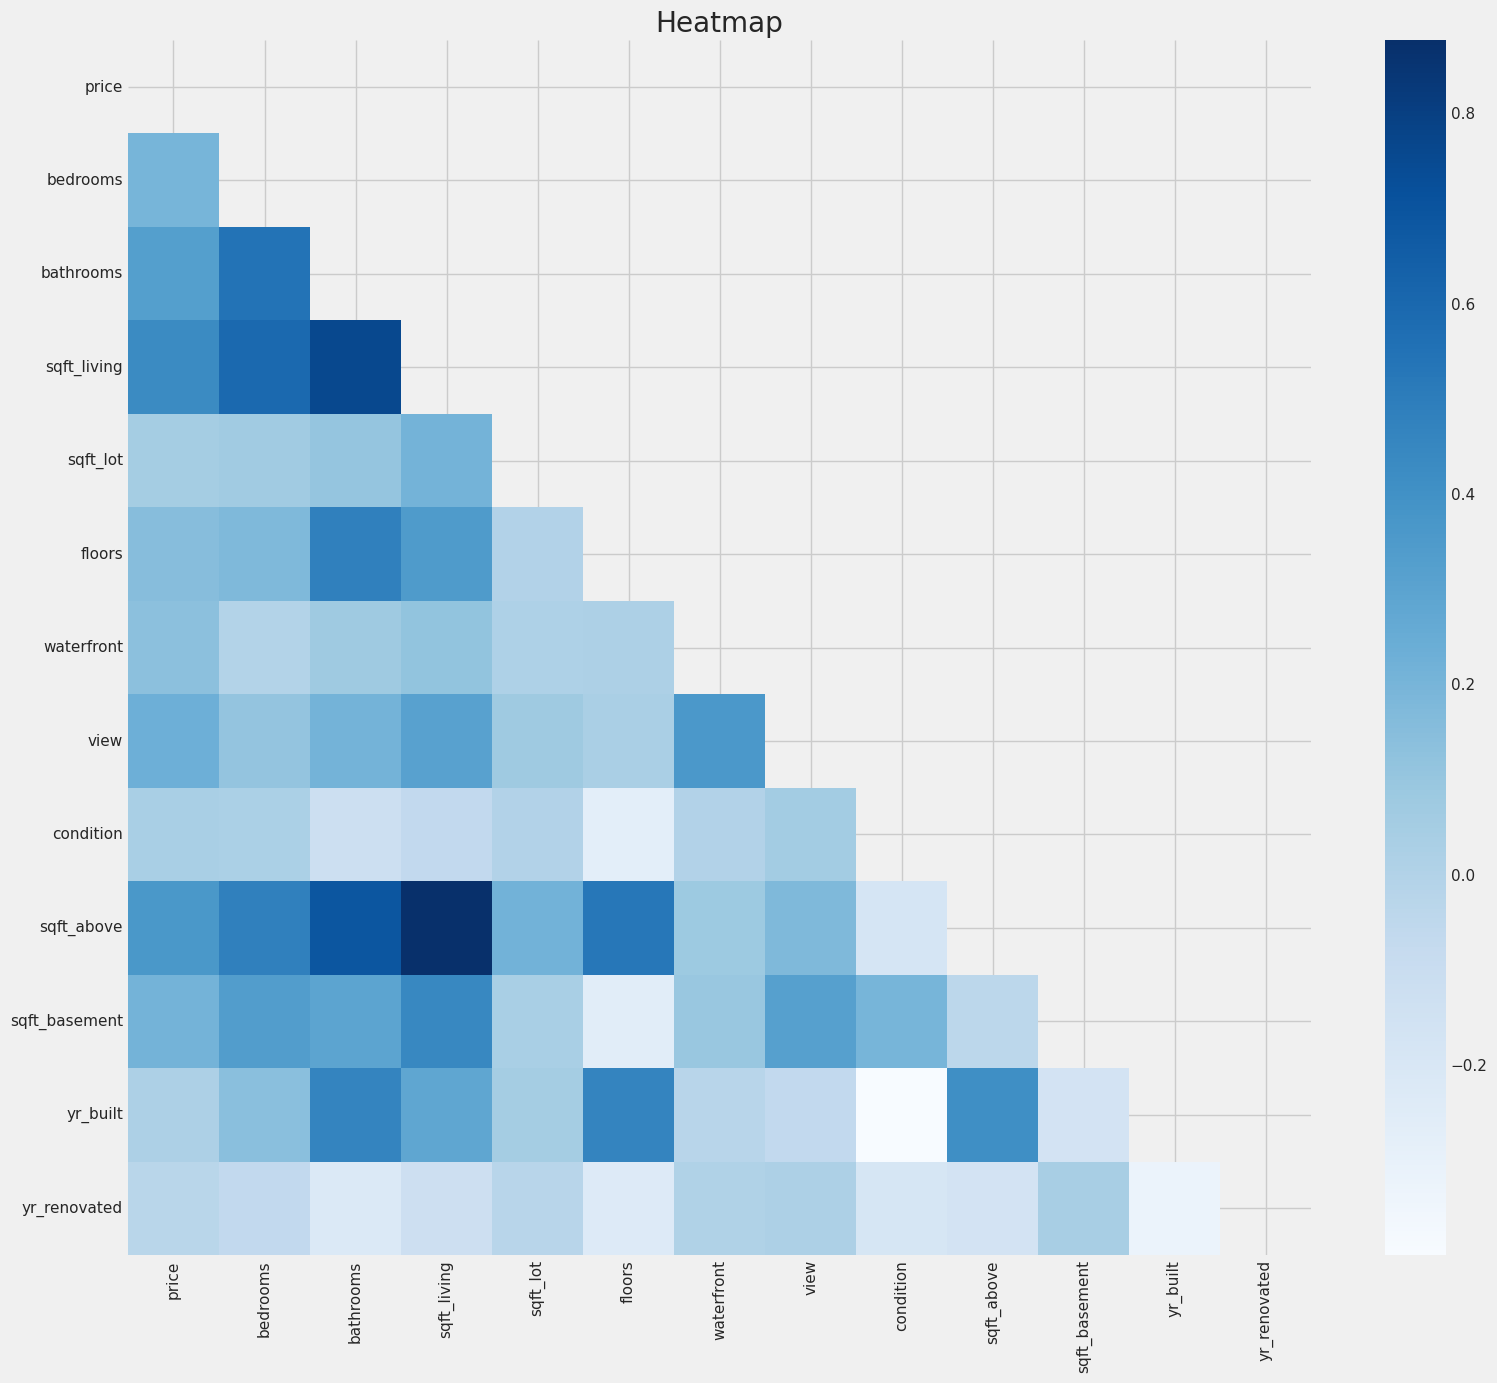

In [117]:
#Convert Date column to DateTime format
data['date'] = pd.to_datetime(data['date'])

# Extract numerical columns for correlation
numerical_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(17,15))
corr_data = numerical_data  # Use only numerical data for correlation
corr_mask = np.triu(corr_data.corr())
h_map = sns.heatmap(corr_data.corr(), mask=corr_mask, cmap='Blues')
h_map.set_title('Heatmap')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

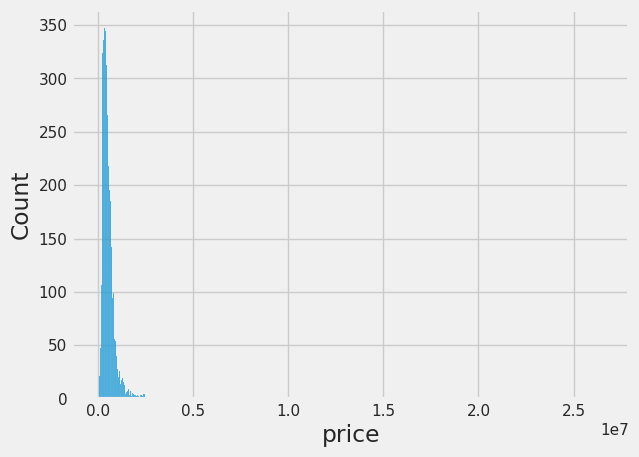

In [118]:
sns.histplot(data.price)

In [119]:
def remove_outliers(data, x):
  q25 = np.percentile(data[x], 25)
  q75 = np.percentile(data[x], 75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  lower, upper = 1, (q75 + cut_off)
  data = data[(data[x] < upper) & (data[x] > lower)]
  print(f"Outliers of {x} are removed\n")
  return data


In [120]:
data = remove_outliers(data, 'price')

Outliers of price are removed



((array([-3.59729352, -3.35962078, -3.22850623, ...,  3.22850623,
          3.35962078,  3.59729352]),
  array([   7800.,   80000.,   83000., ..., 1150000., 1150000., 1150000.])),
 (211053.47018069463, 487456.9019044595, 0.9780093595347804))

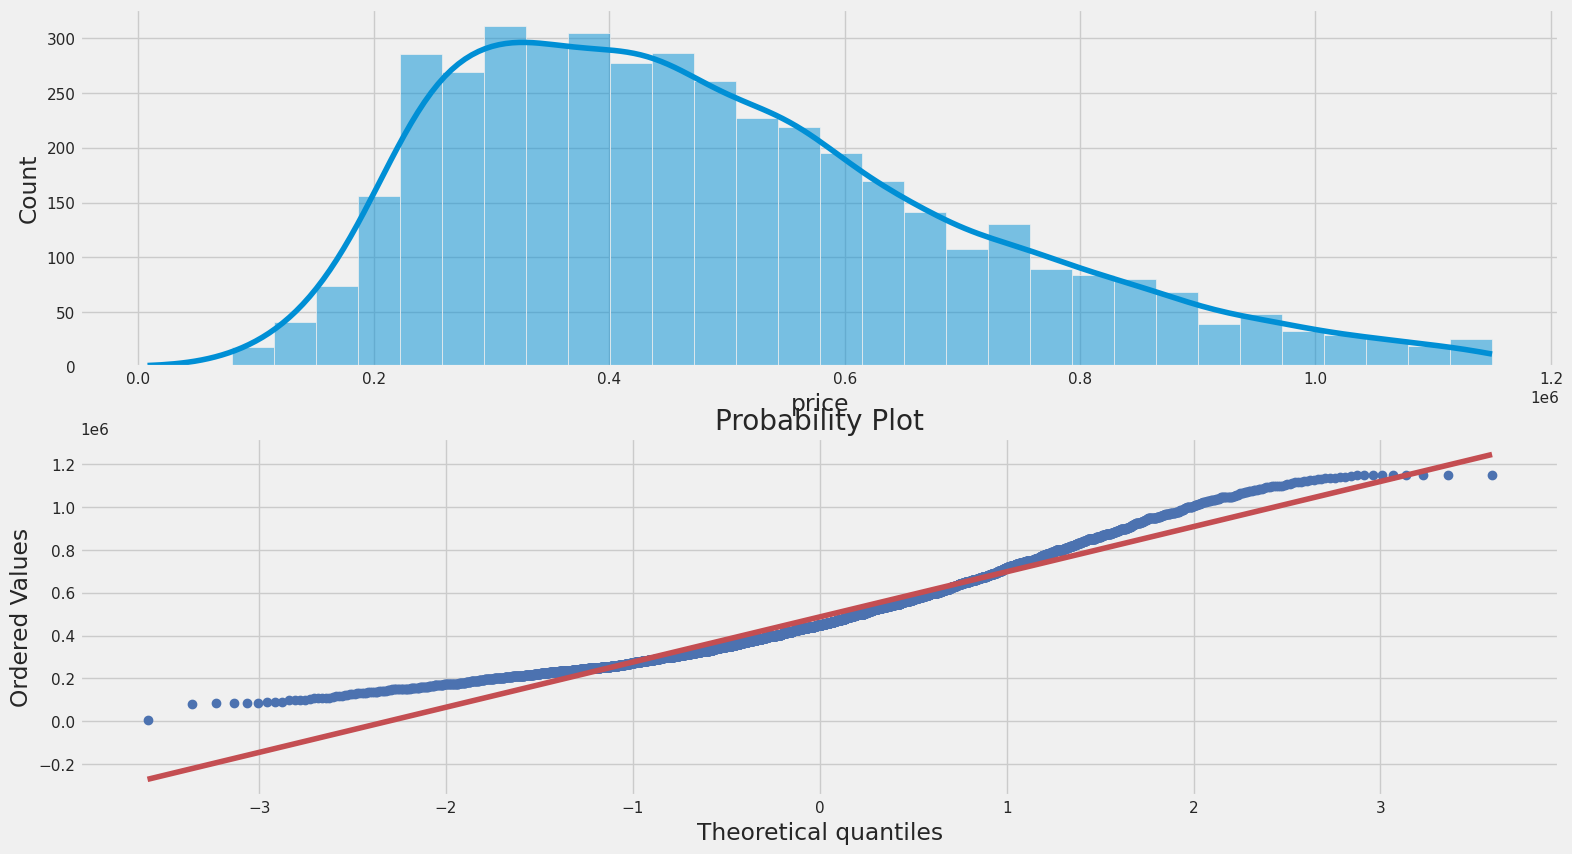

In [121]:
fig = plt.figure(figsize=(17,15))
grid = GridSpec(ncols=3, nrows=3, figure=fig)

#Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data['price'], ax=ax1, kde=True)

#QQ plot

ax2 = fig.add_subplot(grid[1, :])
stats.probplot(data['price'], plot=ax2)


Text(0.5, 0, 'index')

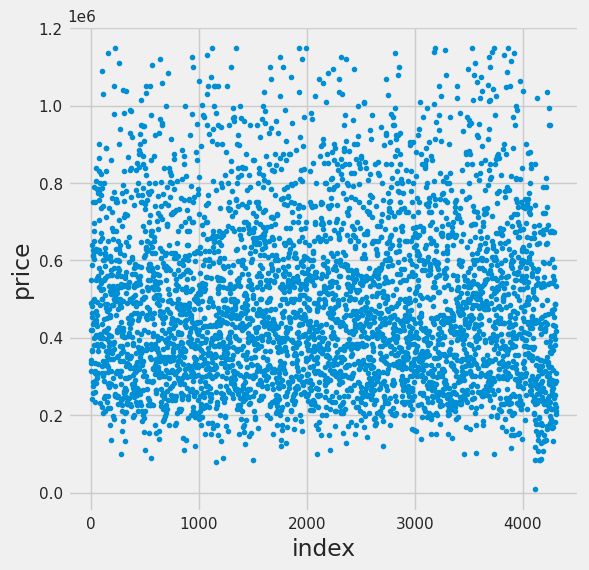

In [122]:
y = np.array(data.price)
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.plot(range(len(y)), y, '.')
plt.ylabel('price')
plt.xlabel('index')


In [123]:
data.shape

(4311, 18)

In [124]:
data.data = pd.to_datetime(data.date)

<ipython-input-124-6c2028096f45>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.data = pd.to_datetime(data.date)


In [125]:
data.date.dt.year.value_counts()

date
2014    4311
Name: count, dtype: int64

<Axes: xlabel='date', ylabel='price'>

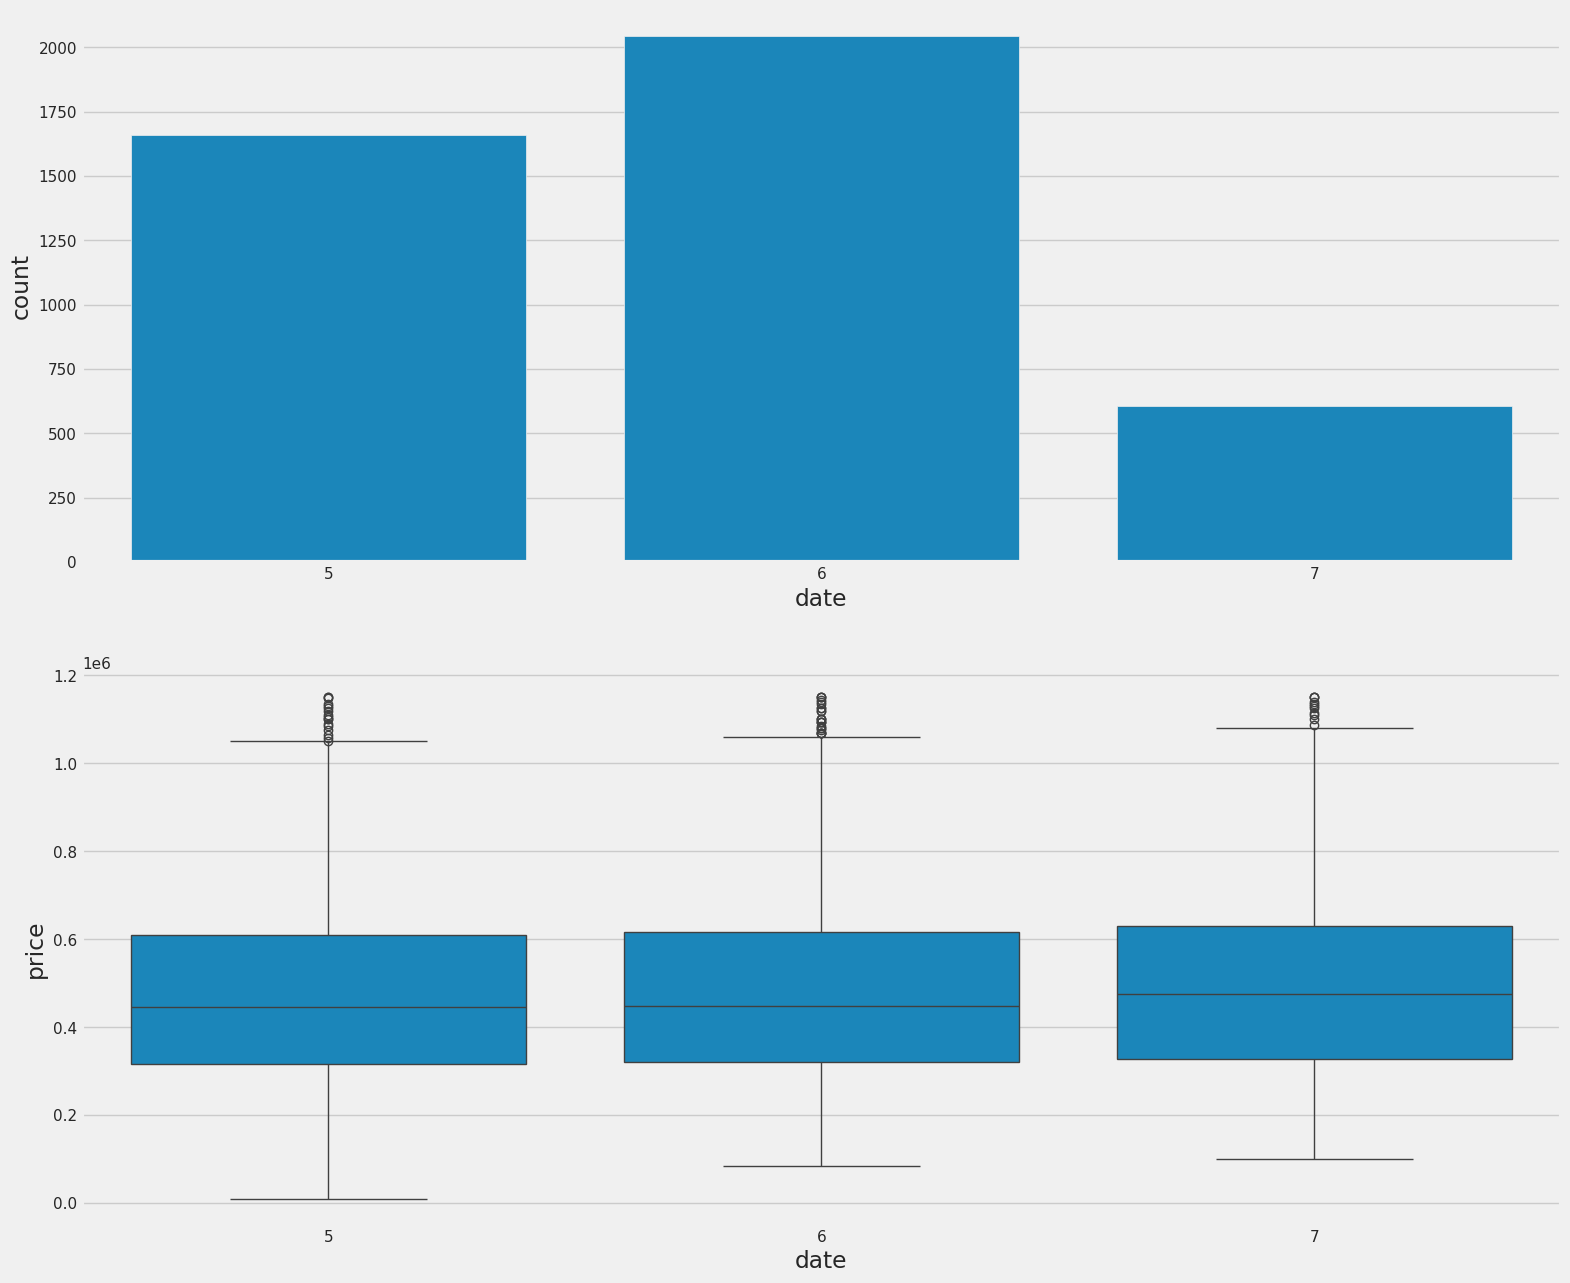

In [126]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=data.date.dt.month, ax=ax1)

ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x=data.date.dt.month, y='price', data=data, ax=ax2)

<ipython-input-127-83a80daa3e16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['date'].dt.day, palette='viridis', ax=ax)  # Changed 'day' to 'date'.dt.day


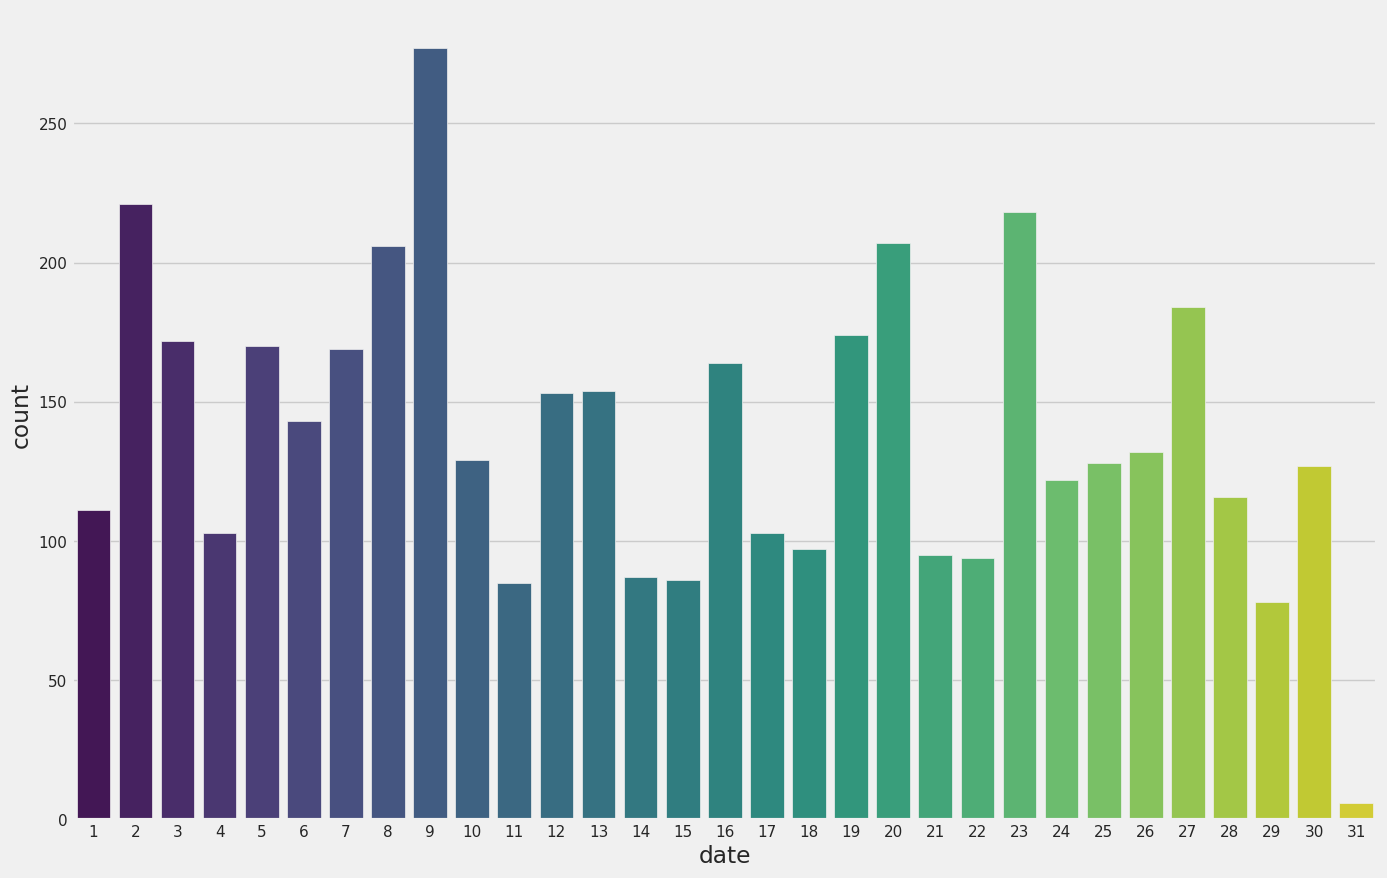

In [127]:
# Create a figure with the specified size
fig, ax = plt.subplots(figsize=(15, 10))

# Extract day from the 'date' column and plot using seaborn
sns.countplot(x=data['date'].dt.day, palette='viridis', ax=ax)  # Changed 'day' to 'date'.dt.day

# Show the plot
plt.show()

<ipython-input-128-d332b0eeb644>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=data.date.dt.day.values, y='price',palette='viridis', data=data, height=5, aspect=2)


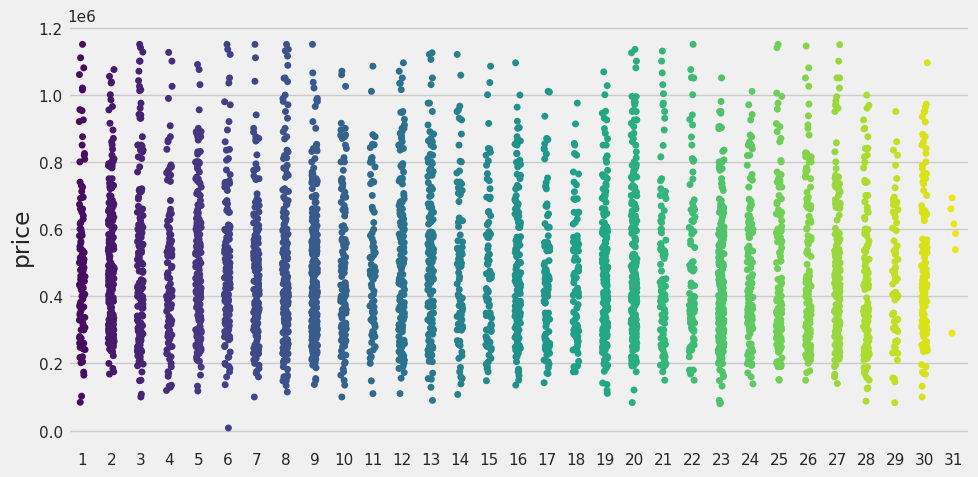

In [128]:
sns.catplot(x=data.date.dt.day.values, y='price',palette='viridis', data=data, height=5, aspect=2)

In [129]:
data.drop('date', axis=1, inplace=True)

In [130]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


<ipython-input-131-52233f90da8b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='bedrooms', y='price', palette='viridis', data=data, height=5, aspect=2)


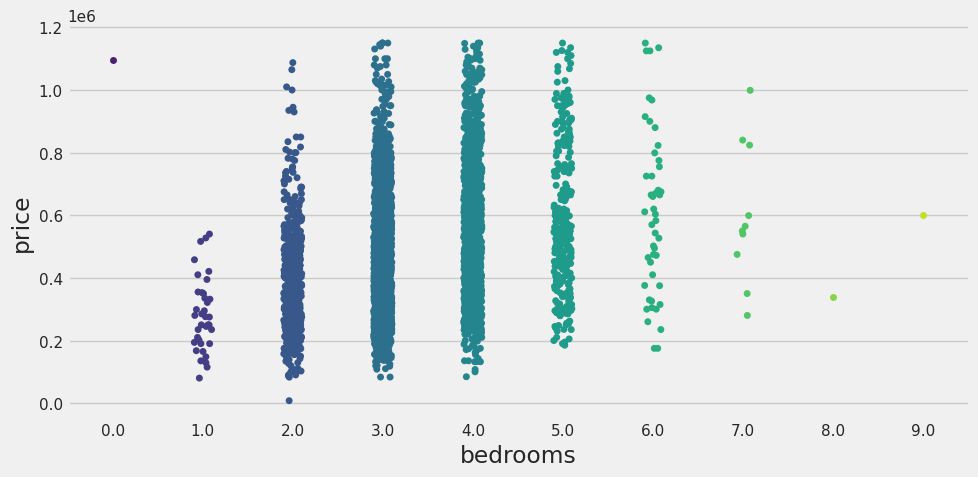

In [131]:
sns.catplot(x='bedrooms', y='price', palette='viridis', data=data, height=5, aspect=2)

<Axes: xlabel='bedrooms', ylabel='Count'>

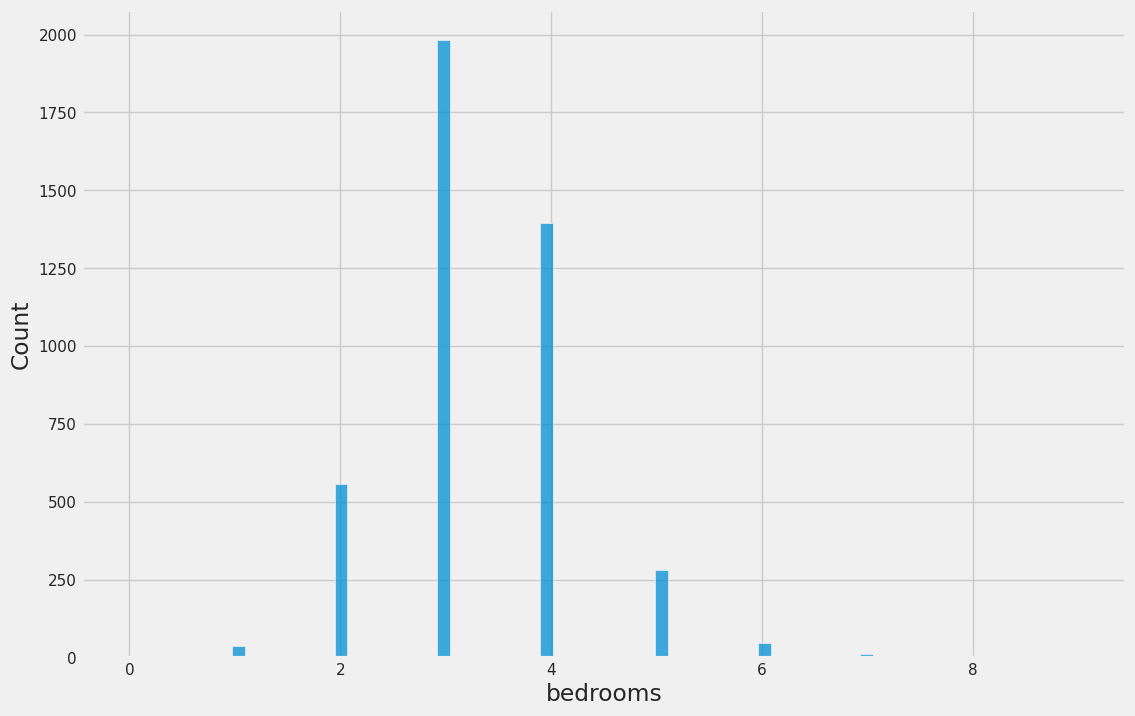

In [132]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data.bedrooms)

In [133]:
data = data[data.bedrooms < 7]

Text(0, 0.5, 'Amount')

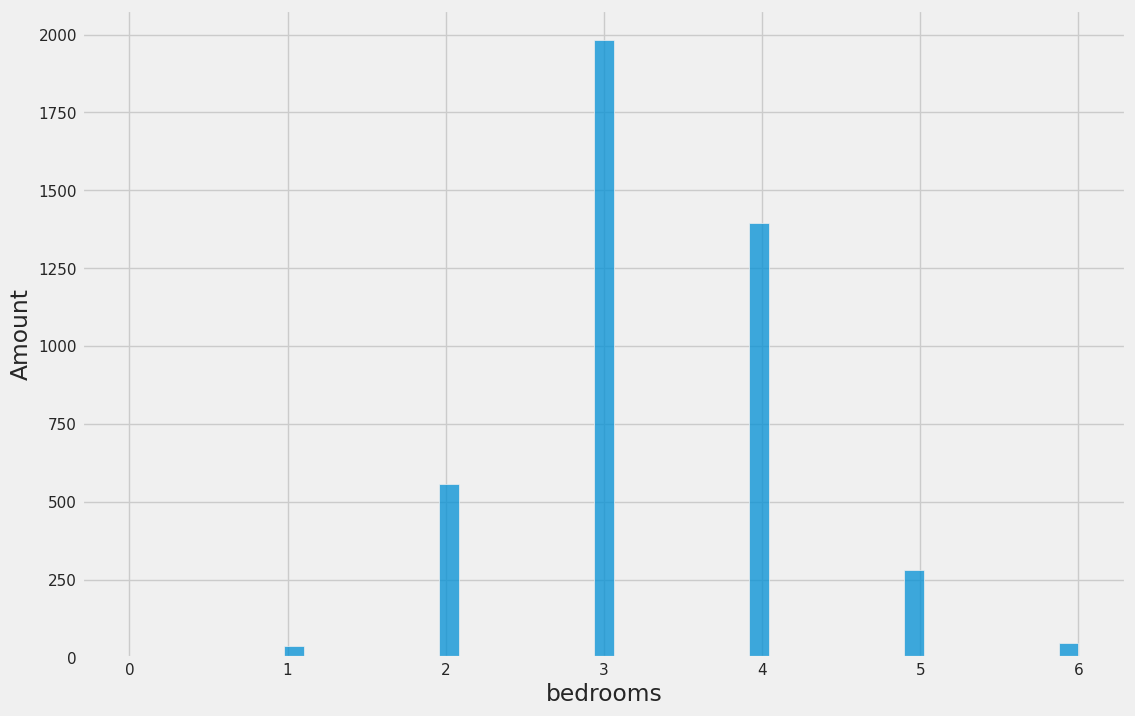

In [134]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data.bedrooms)
plt.ylabel('Amount')

In [135]:
data.shape

(4299, 17)

<ipython-input-136-f0fd100f5a8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['bathrooms'], palette = 'viridis')


<Axes: xlabel='bathrooms', ylabel='count'>

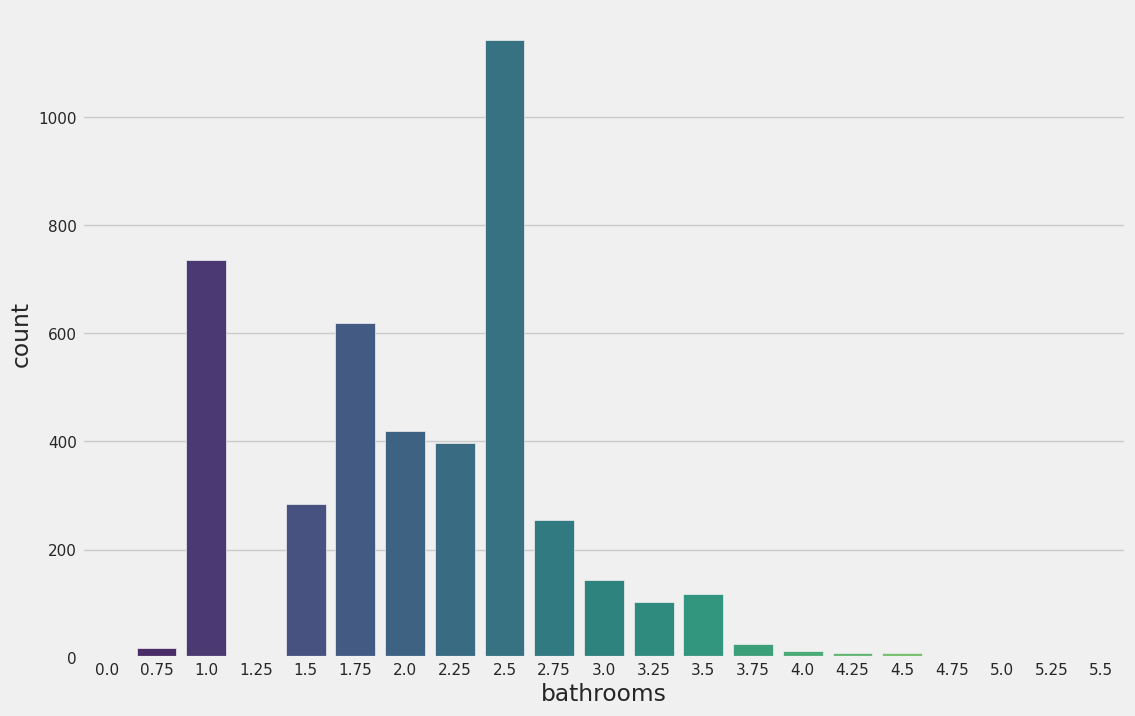

In [136]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(x=data['bathrooms'], palette = 'viridis')

<ipython-input-137-659fe202f11a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='bathrooms', y='price', palette='viridis', data=data, height=5, aspect=2)


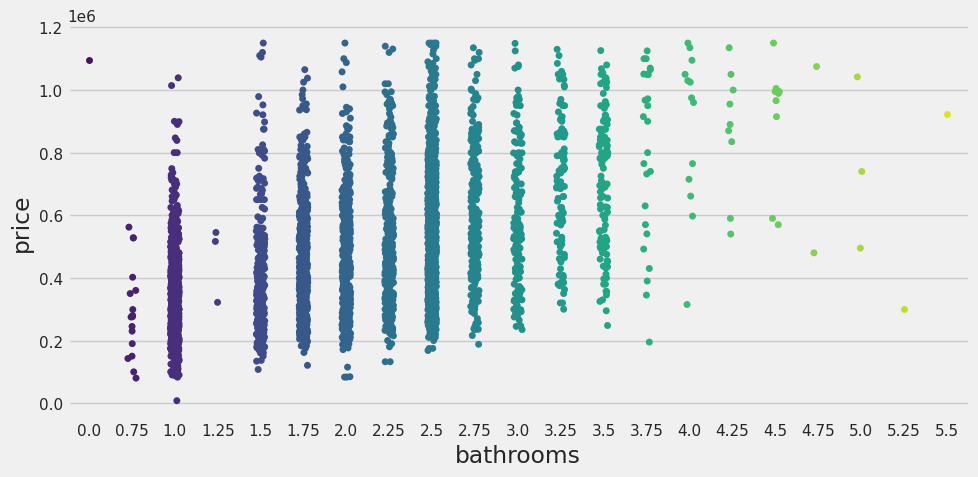

In [137]:
sns.catplot(x='bathrooms', y='price', palette='viridis', data=data, height=5, aspect=2)

In [138]:
mask = (data.bathrooms < 3.75)
data = data[mask]
data.bathrooms = data.bathrooms.apply(lambda x: 1 if (x == 0.75)
                                                       or
                                                      (x == 1.25)
                                                       else x)


<ipython-input-139-659fe202f11a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='bathrooms', y='price', palette='viridis', data=data, height=5, aspect=2)


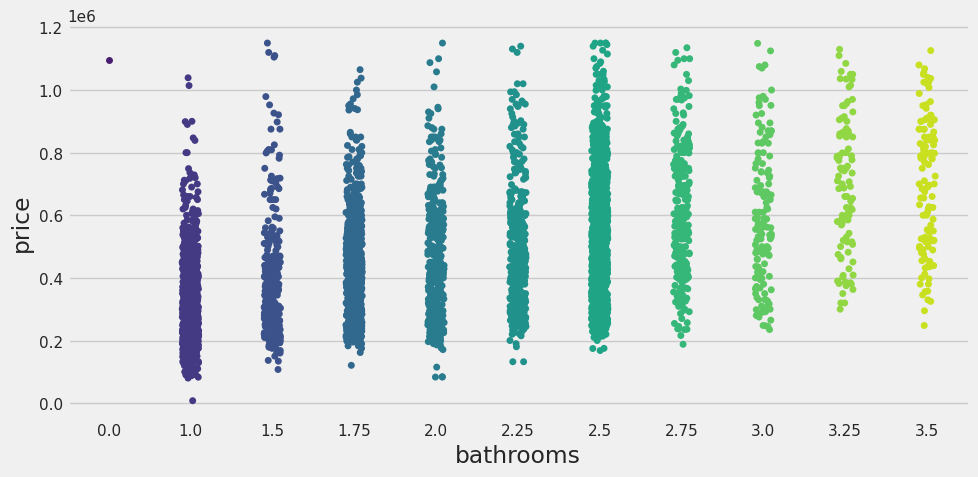

In [139]:
sns.catplot(x='bathrooms', y='price', palette='viridis', data=data, height=5, aspect=2)

In [140]:
data.shape

(4236, 17)

In [141]:
sqft_cols = data.columns[data.columns.str.contains('sqft')]
sqft_cols


Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], dtype='object')

In [142]:
def show_count_plots(data, cols):
  fig = plt.figure(figsize=(10, 10))
  grid = GridSpec(ncols=2, nrows=2, figure=fig)

  for i, name in enumerate(cols):
    ax = fig.add_subplot(grid[i])
    sns.histplot(data[name], kde=True, ax=ax)

<ipython-input-143-b92b752262ba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='floors', y='price', palette='viridis', data=data, height=5, aspect=2)


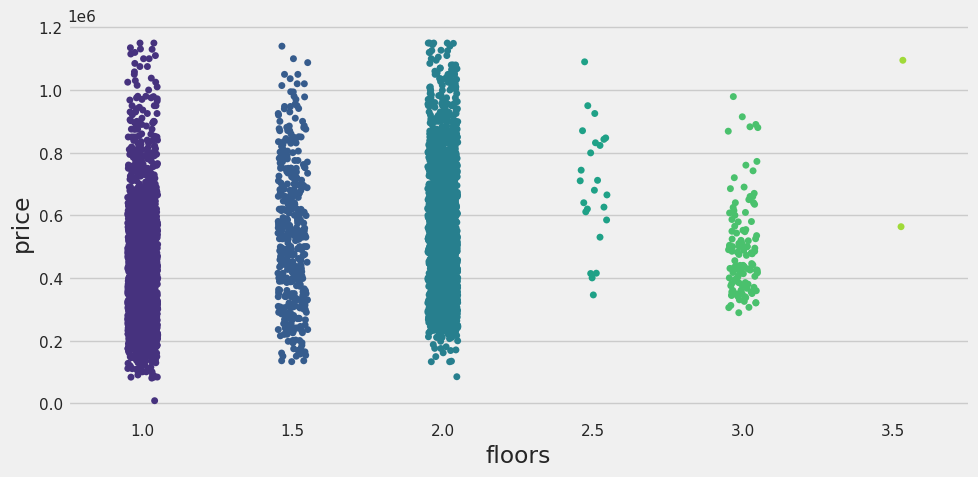

In [143]:
sns.catplot(x='floors', y='price', palette='viridis', data=data, height=5, aspect=2)

In [144]:
mask_floors = {1: 1, 1.5:1, 2:2, 2.5:3, 3:3, 3.5:3}
data.floors = data.floors.map(mask_floors)

<ipython-input-145-b92b752262ba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='floors', y='price', palette='viridis', data=data, height=5, aspect=2)


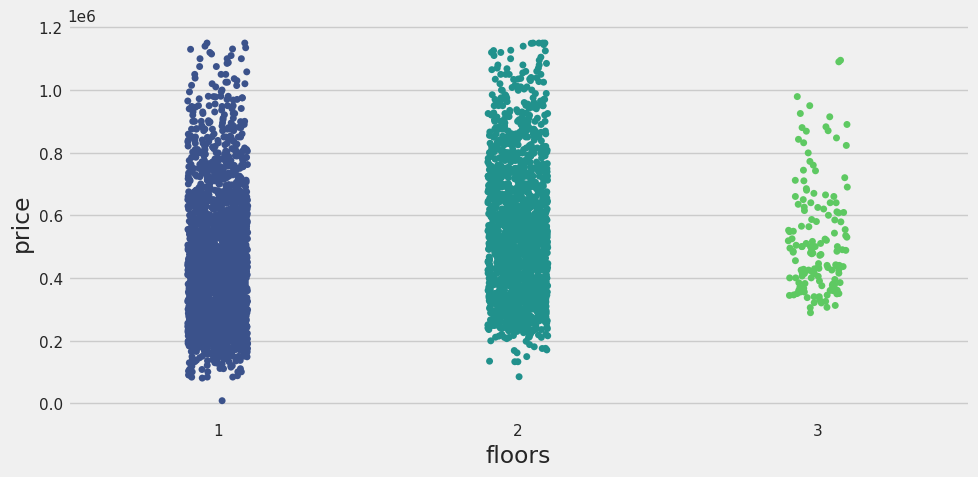

In [145]:
sns.catplot(x='floors', y='price', palette='viridis', data=data, height=5, aspect=2)

In [146]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3.0,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


waterfront
0    4221
1      15
Name: count, dtype: int64


<ipython-input-147-36c4e111bbc2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='waterfront', y='price', palette='viridis',kind='box', data=data, height=5, aspect=2)


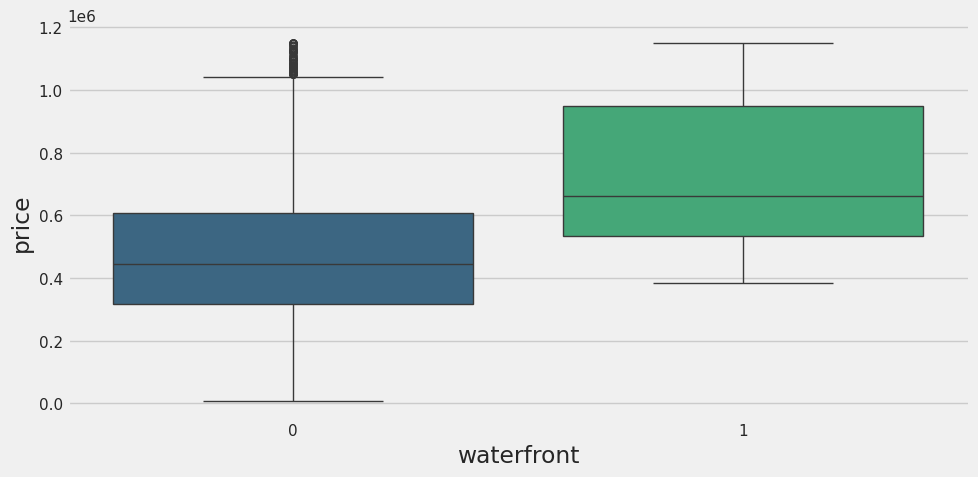

In [147]:
print(data.waterfront.value_counts())
sns.catplot(x='waterfront', y='price', palette='viridis',kind='box', data=data, height=5, aspect=2)

view
0    3925
2     159
3      68
1      54
4      30
Name: count, dtype: int64


<ipython-input-148-7098df78d395>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='view', y='price', palette='viridis',kind='boxen', data=data, height=5, aspect=2)


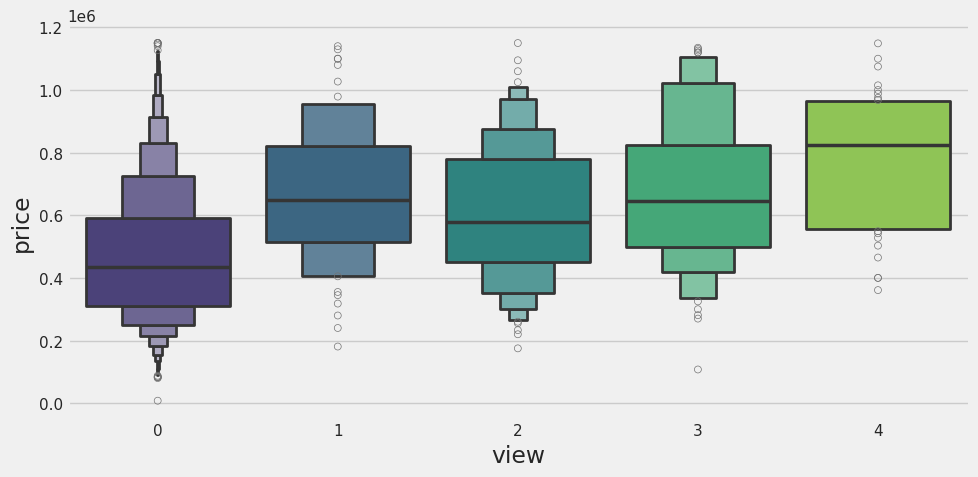

In [148]:
print(data.view.value_counts())
sns.catplot(x='view', y='price', palette='viridis',kind='boxen', data=data, height=5, aspect=2)

condition
3    2649
4    1171
5     380
2      30
1       6
Name: count, dtype: int64


<ipython-input-149-0cdade4c593f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', palette='viridis', data=data, ax=ax1)
<ipython-input-149-0cdade4c593f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='condition', palette='viridis', data=data, ax=ax2)


<Axes: xlabel='condition', ylabel='count'>

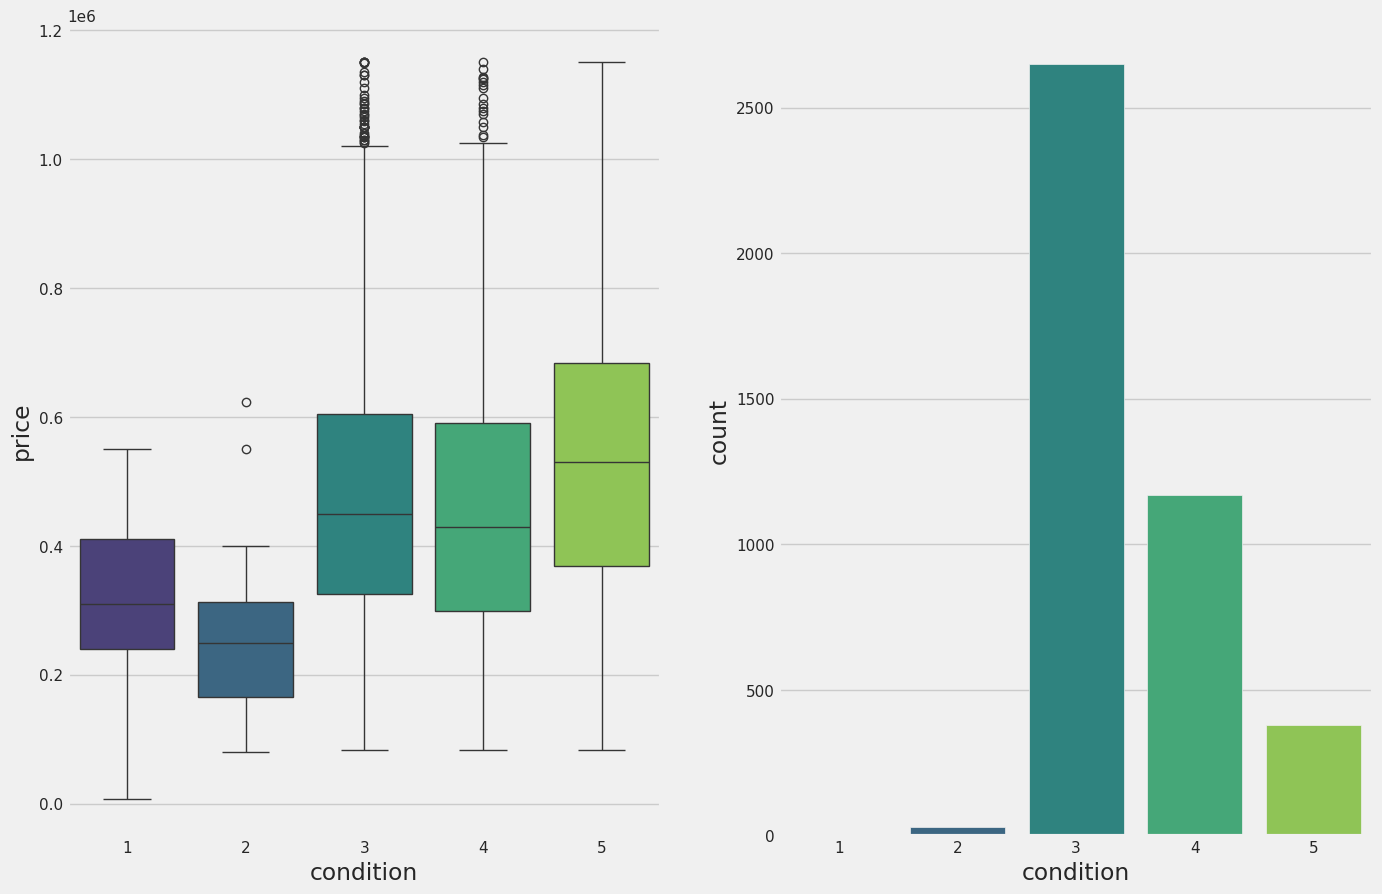

In [149]:
print(data.condition.value_counts())
fig=plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
sns.boxplot(x='condition', y='price', palette='viridis', data=data, ax=ax1)

ax2=fig.add_subplot(122)
sns.countplot(x='condition', palette='viridis', data=data, ax=ax2)

In [150]:
mask_cond = data.condition > 1
data = data[mask_cond]

<ipython-input-151-33a4bb082288>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', palette='viridis', data=data)


<Axes: xlabel='condition', ylabel='price'>

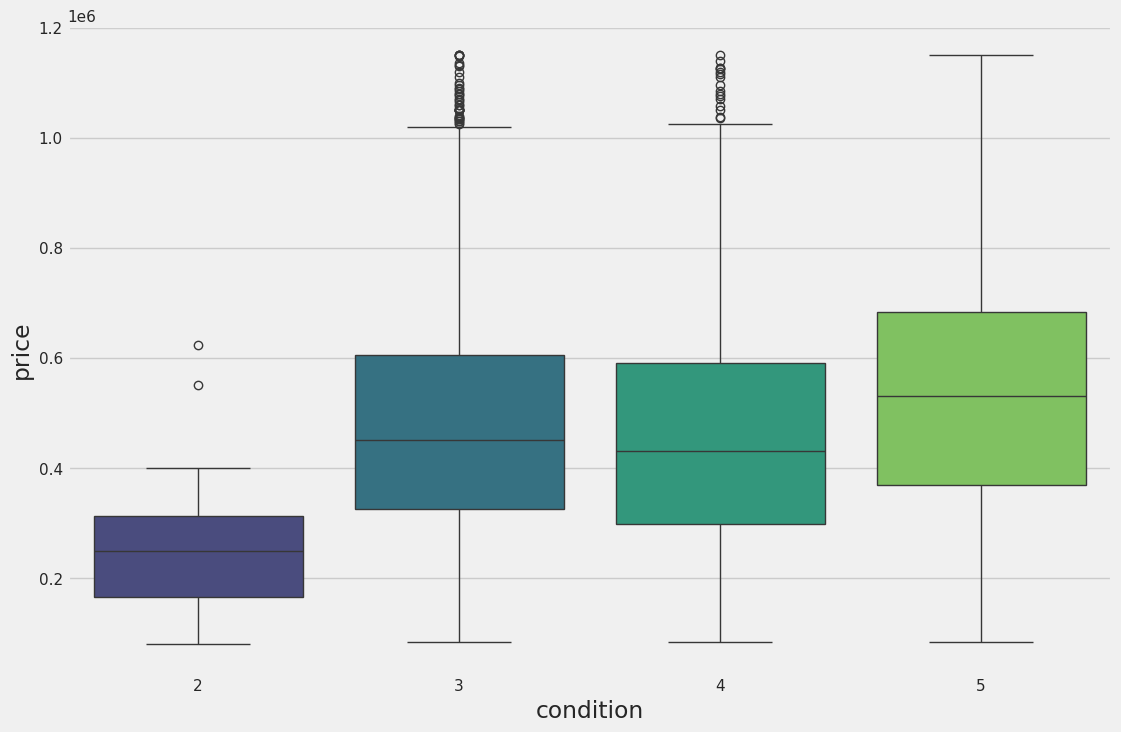

In [151]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='condition', y='price', palette='viridis', data=data)

<Axes: xlabel='yr_built', ylabel='Count'>

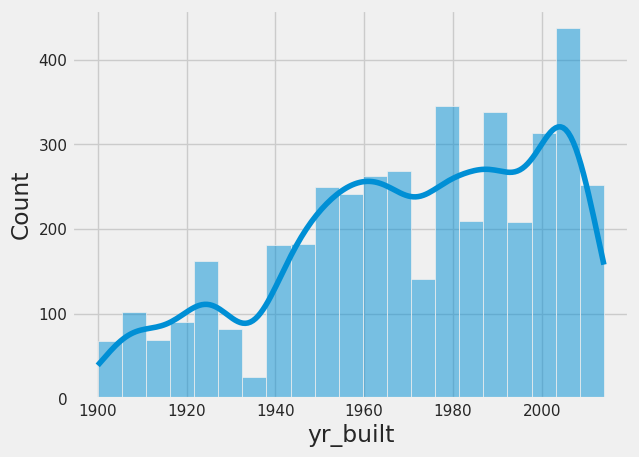

In [152]:
sns.histplot(data.yr_built, kde=True)


<Axes: xlabel='yr_renovated', ylabel='Count'>

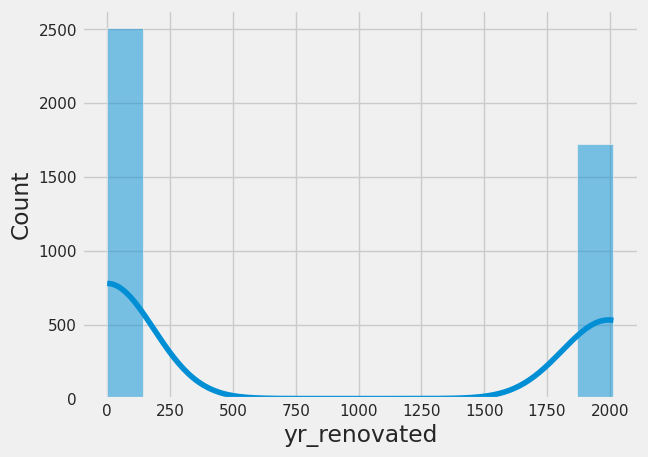

In [153]:
sns.histplot(data.yr_renovated, kde=True)

In [154]:
data.yr_renovated = data.yr_renovated.apply(lambda x: 0 if x == 0 else 1)

yr_renovated
0    2507
1    1723
Name: count, dtype: int64


<ipython-input-155-f27c83f9fcb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='yr_renovated', y='price', palette='viridis',kind='bar', data=data, height=5, aspect=2)


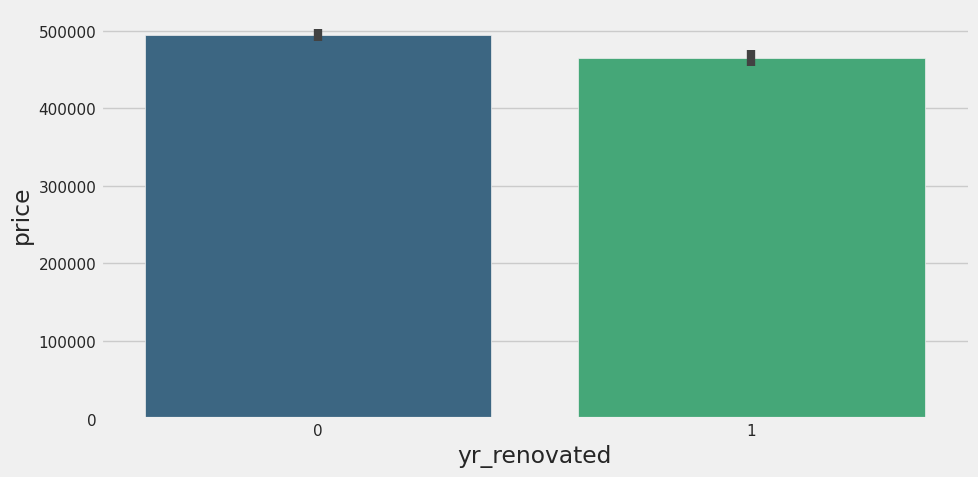

In [155]:
print(data.yr_renovated.value_counts())
sns.catplot(x='yr_renovated', y='price', palette='viridis',kind='bar', data=data, height=5, aspect=2)

In [156]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1,0,0,3,1340,0,1955,1,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3.0,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


In [157]:
data.street.value_counts()

street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
513 N 46th St            2
9126 45th Ave SW         2
8216 Linden Ave N        2
                        ..
34434 30th Ave SW        1
806 S 295th Pl           1
17904 Military Rd S      1
2525 276th Ct NE         1
18717 SE 258th St        1
Name: count, Length: 4160, dtype: int64

In [158]:
data.drop('street', axis=1, inplace=True)

In [159]:
data.city.value_counts().head(10)

city
Seattle        1437
Renton          286
Bellevue        225
Redmond         222
Kent            183
Issaquah        173
Kirkland        172
Auburn          172
Sammamish       161
Federal Way     142
Name: count, dtype: int64

<Axes: ylabel='count'>

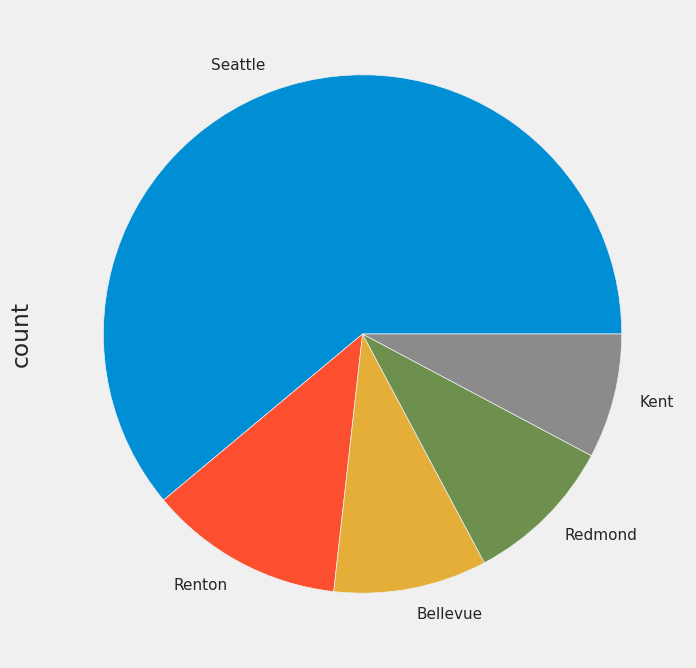

In [160]:
fig = plt.figure(figsize=(12, 8))
data.city.value_counts().head(5).plot.pie()

In [161]:
print(data.statezip.nunique())
print(data.statezip.value_counts())

77
statezip
WA 98103    141
WA 98052    131
WA 98117    129
WA 98115    123
WA 98059    102
           ... 
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
WA 98039      1
Name: count, Length: 77, dtype: int64


In [162]:
data.drop('statezip', axis=1, inplace=True)

<Axes: xlabel='country', ylabel='count'>

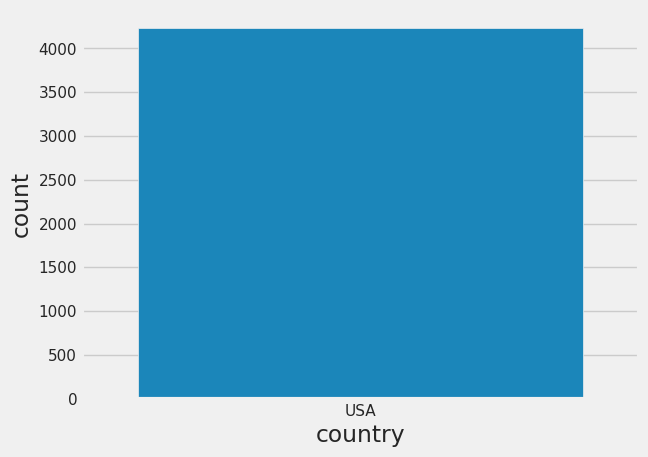

In [163]:
sns.countplot(x=data.country)

In [164]:
data.drop('country', axis=1, inplace=True)

<Axes: >

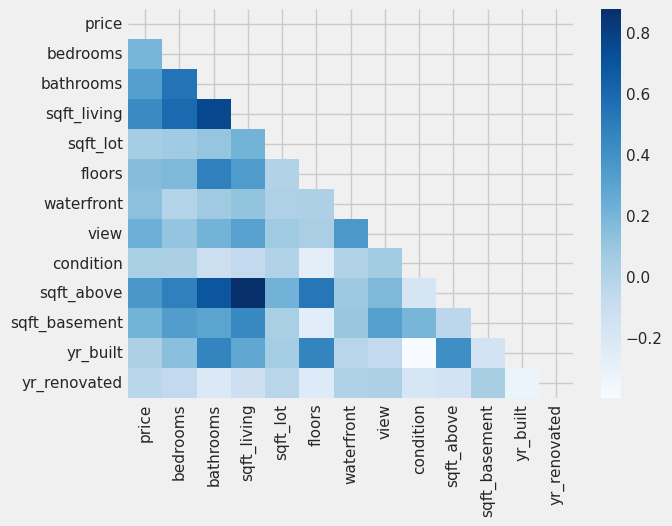

In [165]:
h_map = sns.heatmap(corr_data.corr(), mask=corr_mask, cmap='Blues')
h_map

In [166]:
print(data.shape)
data.head(3)

(4230, 14)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1,0,0,3,1340,0,1955,1,Shoreline
2,342000.0,3.0,2.00,1930,11947,1,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue


In [167]:
#TRAINING
X = data.drop('price', axis=1)
y = data.price.astype(int)

In [168]:
#set up preprocessing numeric columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

In [169]:
#set up preprocessing categorical columns
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

In [170]:
#select columns by datatype
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')

In [171]:
#do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols)
)

In [172]:
#MODEL TRAINING AND VISUALISING
#create a pipeline

def pipeline_model(X, y, data):
  pipe = make_pipeline(preprocessor, LinearRegression())

  print(cross_val_score(pipe, X, y).mean())

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

  pipe.fit(X_train, y_train)

  predict = pipe.predict(X_test)
  print(f'MSE: {metrics.mean_squared_error(y_test, predict)}\n'
        f'\nRMSE: '
        f'{np.sqrt(metrics.mean_squared_error(y_test, predict))}\n'
        f'MAE: {metrics.mean_absolute_error(y_test, predict)}\n'
        f'\n'
        f'Score (train): {pipe.score(X_train, y_train)}\n'
        f'Score (test): {pipe.score(X_test, y_test)}\n')
  comparison_of_results(X_test, y_test, pipe)
  visualize_model_results(data, pipe)

def comparison_of_results(X_test, y_test, model, times=5):
  for i in range(times):
    rnd = np.random.randint(0, y_test.shape[0] - 1)
    real = y_test.iloc[rnd]
    pred = int(model.predict(X_test.iloc[[rnd]])[0])
    print(f'Real value ------> {real}$\n'
          f'Predicted value ------> {pred}$')
    print()

def visualize_model_results(data, model):
  fig = plt.figure(figsize=(17, 10))
  data = data.sort_values(by=['price'])
  X = data.drop('price', axis=1)
  y = data.price.astype(int)

  plt.scatter(range(X.shape[0]), y, color='red', label='Real')
  plt.scatter(range(X.shape[0]), model.predict(X),marker='.', color='blue', label='Predicted')

  plt.legend(loc=2, prop={'size': 25})



0.6782992077807979
MSE: 13486055695.726686

RMSE: 116129.4781514439
MAE: 84550.32912028446

Score (train): 0.6919570902107297
Score (test): 0.7084853993482116

Real value ------> 568000$
Predicted value ------> 604316$

Real value ------> 367500$
Predicted value ------> 326927$

Real value ------> 450385$
Predicted value ------> 382960$

Real value ------> 270000$
Predicted value ------> 280363$

Real value ------> 425000$
Predicted value ------> 423271$



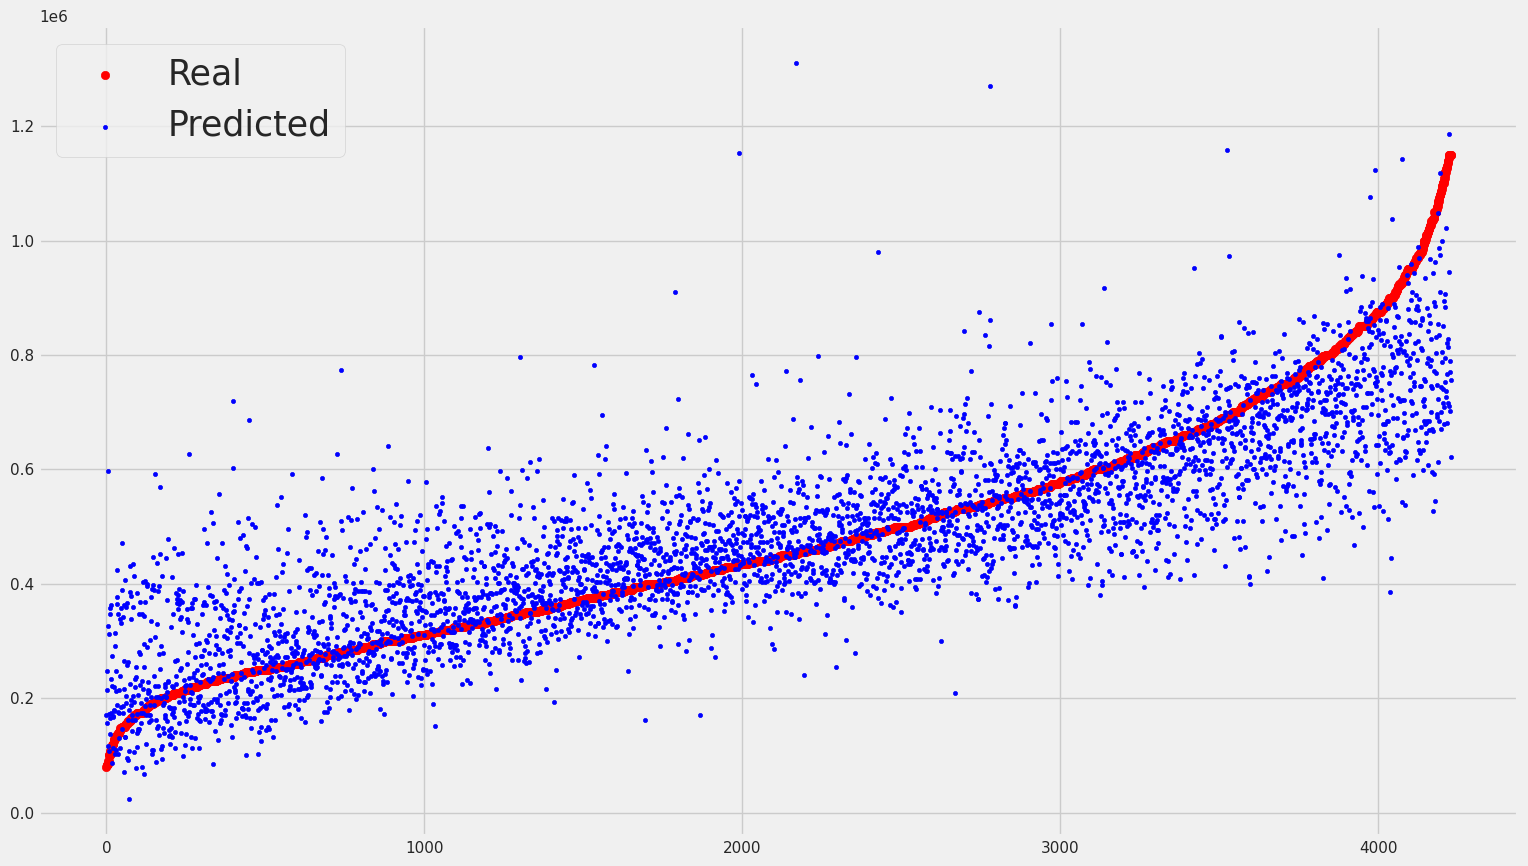

In [173]:
pipeline_model(X, y, data)